In [103]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [104]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely import wkt

In [105]:
from sklearn.cluster import KMeans

In [106]:
vul = pd.read_csv('data/out/v.csv')

In [153]:
infra = pd.read_csv('data/out/infra.csv')

In [154]:
infra

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...
1,1,1710,6059001710,17.10,33.900231,-117.968440,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-117.9765923400579 33.90281815...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
...,...,...,...,...,...,...,...,...,...,...,...
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."
2531,2531,1401,6059001401,14.01,33.940824,-117.941004,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-117.9330468992887 33.94608688...


##### Import a geopandas dataframe and pass crs to final geopandas df below

In [109]:
tr_treestats = gpd.GeoDataFrame.from_file('data/out/tracts_treestats.geojson')

In [110]:
coords = tr_treestats.crs

In [111]:
tr_treestats.geometry

0       MULTIPOLYGON (((-118.41663 32.79555, -118.4165...
1       MULTIPOLYGON (((-117.97659 33.90282, -117.9765...
2       MULTIPOLYGON (((-118.88954 34.81790, -118.8847...
3       MULTIPOLYGON (((-118.65862 34.17142, -118.6584...
4       MULTIPOLYGON (((-118.21630 33.90339, -118.2153...
                              ...                        
2528    MULTIPOLYGON (((-118.33698 34.10837, -118.3369...
2529    MULTIPOLYGON (((-118.32676 34.11112, -118.3267...
2530    MULTIPOLYGON (((-118.21897 34.14000, -118.2173...
2531    MULTIPOLYGON (((-117.93305 33.94609, -117.9330...
2532    MULTIPOLYGON (((-118.12345 33.78715, -118.1222...
Name: geometry, Length: 2533, dtype: geometry

### Testing k-means clustering with simplified dataframe: interesting to discover the dependency among variables!

In [155]:
test = infra[['tree_mean', 'impv_mean']].copy()

In [156]:
test = test.dropna(axis="rows", how="any")

In [157]:
test

,tree_mean,impv_mean
0,0.215304,0.956937
2,0.000000,44.066667
3,8.745668,45.807251
4,1.401094,71.759344
5,2.277339,65.446449
...,...,...
2527,0.971383,78.041335
2528,9.065780,45.360680
2529,14.083056,30.447398
2530,4.293796,62.925182


In [158]:
test.describe()

,tree_mean,impv_mean
count,2517.000000,2517.000000
mean,2.673954,60.896428
std,3.252423,19.873660
min,0.000000,0.000000
25%,0.739535,52.259954
50%,1.506640,65.146535
75%,3.137121,74.809243
max,21.842774,97.365204


In [159]:
wcss = []

In [160]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(test)
    wcss.append(km.inertia_)

### Plot elbow curve

In [161]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

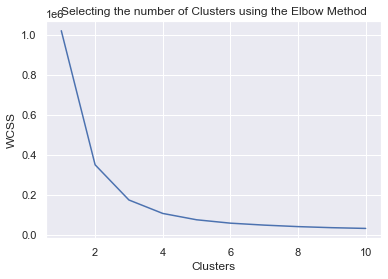

In [162]:
plt.plot(range(1,11), wcss)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

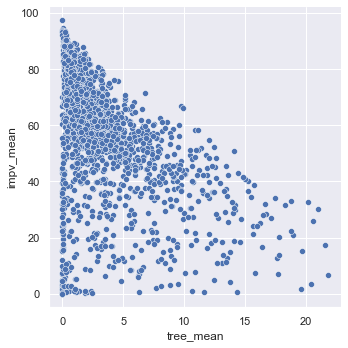

In [164]:
sns.relplot(x='tree_mean', y='impv_mean', data=test);

### Integrate the vulnerability variable with an ecological input(s)

#### Join the two dataframes on GEOID

In [165]:
infra.dropna(axis="rows", how="any")

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
5,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
...,...,...,...,...,...,...,...,...,...,...,...
2527,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."


In [166]:
vul = vul.rename(columns = {'CensusTract': 'GEOID'})
vul

,Unnamed: 0,ZIP,pop2010,GEOID,geometry,vul
0,0,91356.0,4462,6037139301,"MULTIPOLYGON (((-118.571496 34.177579, -118.57...",0.176189
1,1,91356.0,4422,6037139302,"MULTIPOLYGON (((-118.540734 34.180195, -118.54...",-0.597622
2,2,91316.0,3007,6037139502,"MULTIPOLYGON (((-118.532245 34.16201, -118.531...",0.248734
3,3,91316.0,4633,6037139600,"MULTIPOLYGON (((-118.518583 34.158576, -118.51...",0.448743
4,4,91436.0,4920,6037139701,"MULTIPOLYGON (((-118.5098 34.156908, -118.5084...",0.755947
...,...,...,...,...,...,...
2340,8048,90004.0,3513,6037192700,"MULTIPOLYGON (((-118.29171 34.083588, -118.290...",-0.581355
2341,8049,90048.0,2037,6037194500,"MULTIPOLYGON (((-118.378802 34.07639, -118.378...",0.255105
2342,8050,90039.0,4717,6037195100,"MULTIPOLYGON (((-118.276908 34.095835, -118.27...",0.626143
2343,8051,90027.0,3203,6037195300,"MULTIPOLYGON (((-118.29177 34.10178, -118.2895...",0.337343


In [167]:
test2 = pd.merge(infra, vul, how ='inner', on = 'GEOID', sort = False, 
                 copy = True, indicator = False, validate = None).dropna(axis="rows", how="any")
test2

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry_x,Unnamed: 0_y,ZIP,pop2010,geometry_y,vul
1,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570,90221.0,5323,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446
2,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571,90262.0,4903,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531
3,6,541802,6037541802,5418.02,33.909880,-118.186675,2.123907,23.0,63.546647,24.440263,"MULTIPOLYGON (((-118.19359 33.906542, -118.193...",2582,90262.0,5431,"MULTIPOLYGON (((-118.193753 33.906147, -118.19...",-0.426446
4,7,542000,6037542000,5420.00,33.905571,-118.203158,2.488353,23.0,62.310316,22.896972,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",2583,90221.0,5732,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",-0.498291
5,8,573800,6037573800,5738.00,33.824212,-118.098412,4.685759,23.0,56.614293,9.985991,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",2604,90808.0,4284,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",0.458502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2526,300501,6037300501,3005.01,34.220689,-118.240049,3.935402,23.0,52.853705,447.889465,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",6402,91214.0,3868,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",0.443941
2013,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043,91803.0,4218,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946
2014,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045,90068.0,3529,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253
2015,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046,90068.0,3448,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082


In [168]:
test2.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=1968)

In [169]:
test2.describe()

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,Unnamed: 0_y,ZIP,pop2010,vul
count,1968.000000,1968.000000,1.968000e+03,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1229.635671,390599.259146,6.037391e+09,3905.992591,34.061544,-118.254144,2.708679,24.762195,62.124193,152.285867,3912.806402,90814.250508,4149.387195,-0.150855
std,790.831051,214227.442831,2.142274e+05,2142.274428,0.169277,0.184833,3.216578,7.259820,18.202645,163.589108,2326.760908,774.812770,1211.432479,0.519170
min,4.000000,101110.000000,6.037101e+09,1011.100000,33.708857,-118.861046,0.000000,21.000000,0.471028,2.508811,0.000000,90001.000000,1512.000000,-1.543588
25%,533.750000,208583.000000,6.037209e+09,2085.830000,33.958250,-118.379853,0.812146,23.000000,53.825882,39.334341,2084.750000,90061.000000,3237.750000,-0.563455
50%,1093.500000,403317.500000,6.037403e+09,4033.175000,34.053994,-118.271735,1.583497,23.000000,65.714543,95.206172,3330.500000,90706.000000,4064.000000,-0.197317
75%,2027.250000,543305.250000,6.037543e+09,5433.052500,34.149180,-118.145535,3.130076,23.000000,74.888806,225.859612,5834.250000,91354.000000,4985.250000,0.259449
max,2530.000000,920339.000000,6.037920e+09,9203.390000,34.746448,-117.713487,21.842774,81.000000,97.365204,1103.354548,8056.000000,93591.000000,7720.000000,1.377370


In [170]:
wcss2 = []

In [171]:
infra_vul = test2[['vul', 'pop2010', 'tree_mean','land_majority', 'impv_mean']]

In [172]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(infra_vul)
    wcss2.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

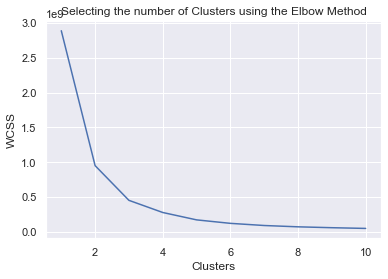

In [173]:
plt.plot(range(1,11), wcss2)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [174]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(infra_vul)
y_kmeans = kmeans.predict(infra_vul)

In [175]:
infra_vul['cluster'] = pd.Series(y_kmeans, index=infra_vul.index)

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_27892/136682810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infra_vul['cluster'] = pd.Series(y_kmeans, index=infra_vul.index)


In [176]:
infra_vul.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=1968)

In [177]:
print(infra_vul)

           vul  pop2010  tree_mean  land_majority  impv_mean  cluster
1    -0.585446     5323   1.401094           23.0  71.759344        1
2    -0.516531     4903   2.277339           23.0  65.446449        1
3    -0.426446     5431   2.123907           23.0  63.546647        1
4    -0.498291     5732   2.488353           23.0  62.310316        3
5     0.458502     4284   4.685759           23.0  56.614293        2
...        ...      ...        ...            ...        ...      ...
2012  0.443941     3868   3.935402           23.0  52.853705        2
2013 -0.129946     4218   0.971383           23.0  78.041335        2
2014 -0.215253     3529   9.065780           23.0  45.360680        2
2015  0.508082     3448  14.083056           22.0  30.447398        2
2016  0.239630     4302   4.293796           23.0  62.925182        2

[1968 rows x 6 columns]


In [178]:
# sns.relplot(x='vul', y='dem_median', hue = 'cluster', data=infra_vul)

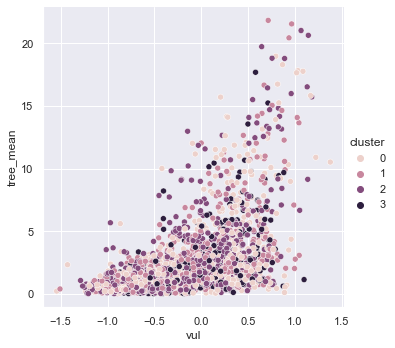

In [179]:
sns.relplot(x='vul', y='tree_mean', hue = 'cluster', data=infra_vul)

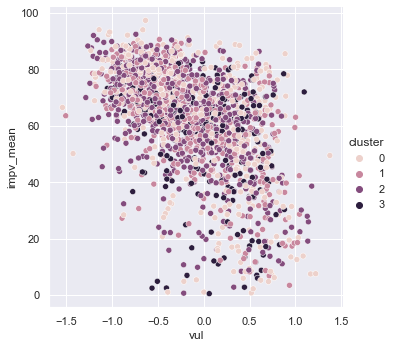

In [180]:
sns.relplot(x='vul', y='impv_mean', hue = 'cluster', data=infra_vul)

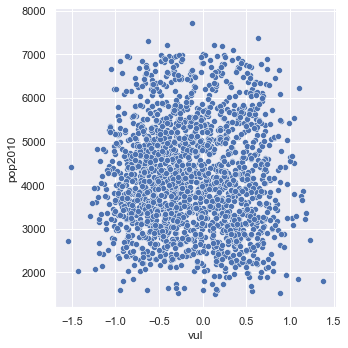

In [181]:
sns.relplot(x='vul', y='pop2010', data=infra_vul)

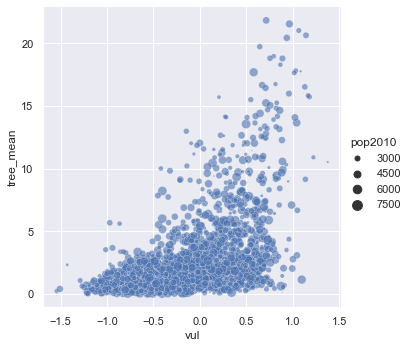

In [182]:
sns.relplot(x='vul', y='tree_mean', size = 'pop2010', sizes=(1, 100), alpha = 0.6 ,data=infra_vul);

### Join pandas dataframe back to geometry and convert to geopandas

##### Left: vul; right: infra_vul w/clusters

In [183]:
merged = pd.merge(test2, infra_vul)

In [184]:
merged = GeoDataFrame(merged)

In [146]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [185]:
choro = merged[['GEOID', 'tree_mean', 'land_majority', 'impv_mean', 'dem_mean', 'vul', 'pop2010', 'cluster', 'geometry_x']]
choro = choro.rename(columns = {'geometry_x': 'geometry'})
choro

,GEOID,tree_mean,land_majority,impv_mean,dem_mean,vul,pop2010,cluster,geometry
0,6037541605,1.401094,23.0,71.759344,21.508713,-0.585446,5323,1,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
1,6037541801,2.277339,23.0,65.446449,24.308732,-0.516531,4903,1,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
2,6037541802,2.123907,23.0,63.546647,24.440263,-0.426446,5431,1,"MULTIPOLYGON (((-118.19359 33.906542, -118.193..."
3,6037542000,2.488353,23.0,62.310316,22.896972,-0.498291,5732,3,"MULTIPOLYGON (((-118.207337 33.907321, -118.20..."
4,6037573800,4.685759,23.0,56.614293,9.985991,0.458502,4284,2,"MULTIPOLYGON (((-118.109003 33.819121, -118.10..."
...,...,...,...,...,...,...,...,...,...
1963,6037300501,3.935402,23.0,52.853705,447.889465,0.443941,3868,2,"MULTIPOLYGON (((-118.248753 34.222495, -118.24..."
1964,6037480902,0.971383,23.0,78.041335,138.571439,-0.129946,4218,2,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
1965,6037189600,9.065780,23.0,45.360680,175.437523,-0.215253,3529,2,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
1966,6037189400,14.083056,22.0,30.447398,237.594161,0.508082,3448,2,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."


In [186]:
choro = GeoDataFrame(choro)

In [187]:
choro['geometry'] = choro['geometry'].apply(wkt.loads)

## Re-run cluster analysis with social variables only: more meaningful result?

In [196]:
vul_cl = test2[['vul', 'land_majority']]

In [197]:
wcss3 = []

In [198]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(vul_cl)
    wcss3.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

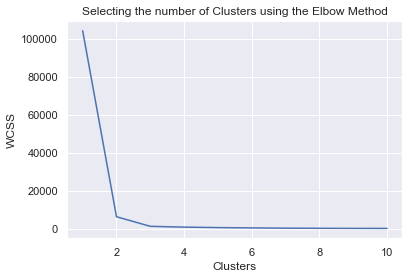

In [199]:
plt.plot(range(1,11), wcss3)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [200]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(vul_cl)
y_kmeans2 = kmeans.predict(vul_cl)

In [201]:
vul_cl['cluster'] = pd.Series(y_kmeans2, index=vul_cl.index)

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_27892/1888783517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vul_cl['cluster'] = pd.Series(y_kmeans2, index=vul_cl.index)


In [202]:
vul_cl

,vul,land_majority,cluster
1,-0.585446,23.0,0
2,-0.516531,23.0,0
3,-0.426446,23.0,0
4,-0.498291,23.0,0
5,0.458502,23.0,0
...,...,...,...
2012,0.443941,23.0,0
2013,-0.129946,23.0,0
2014,-0.215253,23.0,0
2015,0.508082,22.0,0


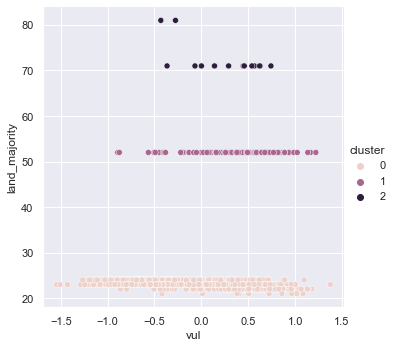

In [203]:
sns.relplot(x='vul', y='land_majority', hue = 'cluster', data=vul_cl)

### Use @perrygeo workaround to convert pd to gpd

In [188]:
choro.__class__ = gpd.GeoDataFrame
choro.crs = {}
choro.set_geometry('geometry')
choro.to_file('data/out/choro.geojson', driver="GeoJSON")

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_27892/1473614639.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm)


<AxesSubplot:title={'center':'Clustered Los Angeles Census Tracts'}>

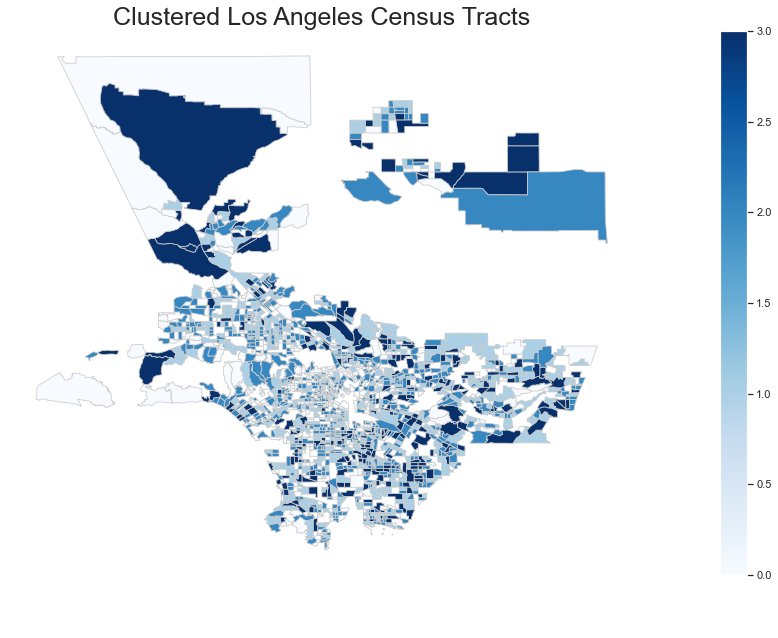

In [189]:
# set the value column that will be visualised
variable = 'cluster'

# set the range for the choropleth values
vmin, vmax = 0, 3

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Clustered Los Angeles Census Tracts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Data Sources: MRLC.gov and https://healthyplacesindex.org/', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm)
# create map
choro.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')